In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
gender_race = pd.read_csv("../data/race/gender.csv")
gender_race.head()

,Race,Gender,Count,Total Live Births,Rate
0,American Indian,Female,49,9595,5.11
1,American Indian,Male,56,10032,5.58
2,Asian,Female,836,309001,2.71
3,Asian,Male,1051,330943,3.18
4,Black,Female,1311,138450,9.47


In [3]:
race_list = gender_race.groupby("Race").count()['Gender'].keys().tolist()

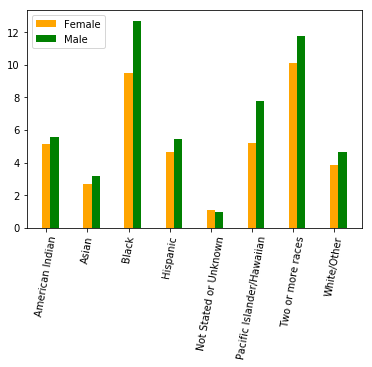

In [4]:
gender = ['Female', 'Male']
colors = ['orange', 'green']
x_cats = race_list
x_values = np.arange(len(x_cats))

plots = plt.subplot()

for i in range(len(gender)):
    selected_factor = gender_race.loc[gender_race['Gender'] == gender[i]]
    plt.bar(x_values+i*.2, selected_factor['Rate'], width=.2, color=colors[i])

plt.xticks(x_values, x_cats, rotation=80)
plt.legend(gender)
plt.show()

In [5]:
age_race = pd.read_csv("../data/race/age.csv")
age_race.head()

,Race,Age at death,Count,Total Live Births,Rate
0,American Indian,Neonatal,60,19627,3.06
1,American Indian,PostNeonatal,45,19627,2.29
2,Asian,Neonatal,1308,639944,2.04
3,Asian,PostNeonatal,579,639944,0.90
4,Black,Neonatal,2007,282125,7.11


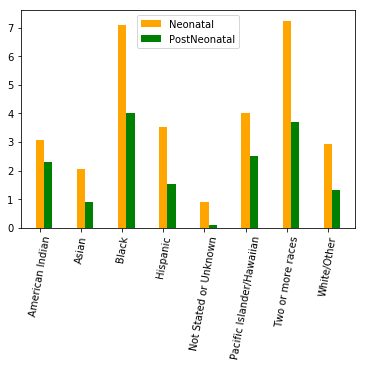

In [6]:
age = ['Neonatal', 'PostNeonatal']
colors = ['orange', 'green']
x_cats = race_list
x_values = np.arange(len(x_cats))

plots = plt.subplot()

for i in range(len(age)):
    selected_factor = age_race.loc[age_race['Age at death'] == age[i]]
    plt.bar(x_values+i*.2, selected_factor['Rate'], width=.2, color=colors[i])

plt.xticks(x_values, x_cats, rotation=80)
plt.legend(age)
plt.show()

In [12]:
race_df = pd.read_csv("../data/race/total.csv")
sorted_df = race_df.sort_values('Count')
sorted_df

,Race,Count,Total Live Births,Rate
4,Not Stated or Unknown,91,89583,1.02
0,American Indian,105,19627,5.35
5,Pacific Islander/Hawaiian,153,23499,6.51
6,Two or more races,1038,94906,10.94
1,Asian,1887,639944,2.95
2,Black,3137,282125,11.12
7,White/Other,6236,1465278,4.26
3,Hispanic,13657,2695240,5.07


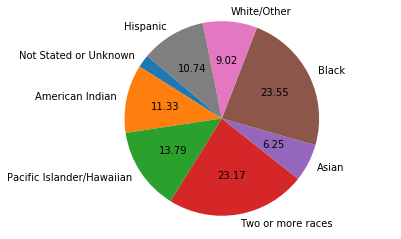

<Figure size 432x288 with 0 Axes>

In [19]:
def my_autopct(pct):
    return ('%.2f' % pct) if pct > 3 else ''

plt.pie(sorted_df['Rate'], labels=sorted_df['Race'][:].tolist(), 
        autopct=my_autopct, startangle=140)
plt.axis('equal')
plt.show()
plt.savefig('../images/race.png')